In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

In [10]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3


In [3]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [25]:
 # Fetch current BTC price
response_data = requests.get(btc_url)
response_data

# Fetch current ETH price
response_data1 = requests.get(eth_url)
response_data1


<Response [200]>

In [26]:
# Store response using `content` attribute (eth)
response_conten1t = response_data1.content

In [5]:
# Store response using `content` attribute (btc)
response_content = response_data.content

In [7]:
# Format BTC data as JSON
data = response_data.json()

In [27]:
# Format ETH data as JSON 
data1 = response_data1.json()

In [9]:
import json
# Use json.dumps with argument indent=4 to format data
print(json.dumps(data, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 19078893,
            "total_supply": 19078893,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 20798.0,
                    "volume_24h": 17706425531,
                    "market_cap": 397067547371,
                    "percentage_change_1h": 0.170020205142883,
                    "percentage_change_24h": -1.23956191855156,
                    "percentage_change_7d": 0.783270575135821,
                    "percent_change_1h": 0.170020205142883,
                    "percent_change_24h": -1.23956191855156,
                    "percent_change_7d": 0.783270575135821
                },
                "CAD": {
                    "price": 26754.5472,
                    "volume_24h": 22777545803.0784,
                   

In [28]:
print(json.dumps(data1, indent=4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 121326999,
            "total_supply": 121326999,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 1171.38,
                    "volume_24h": 12099473783,
                    "market_cap": 142191376327,
                    "percentage_change_1h": -0.826369677134456,
                    "percentage_change_24h": -3.85294424539826,
                    "percentage_change_7d": 3.47426325465334,
                    "percent_change_1h": -0.826369677134456,
                    "percent_change_24h": -3.85294424539826,
                    "percent_change_7d": 3.47426325465334
                },
                "CAD": {
                    "price": 1507.800336,
                    "volume_24h": 15574442653.4776,
               

In [29]:
#get BTC price from JSON data 
btc_value = data['data']['1']['quotes']['CAD']['price']

In [30]:
print(btc_value)

26754.5472


In [32]:
#get ETH price from JSON data 
eth_value = data1['data']['1027']['quotes']['CAD']['price']

In [33]:
print(eth_value)

1507.800336


In [34]:
#calculate the value of BTC and ETH that you currently hold
my_btc_value = btc_value*my_btc
my_eth_value = eth_value*my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")


The current value of your 1.2 BTC is $32105.46
The current value of your 5.3 ETH is $7991.34


In [65]:
# Collect Investments Data Using Alpaca: SPY (stocks) and AGG (bonds)
# Set current amount of shares
my_agg = 200
my_spy = 50


In [35]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [36]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [37]:
# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [52]:
# Format current date as ISO format
start_date = pd.Timestamp("2021-06-24", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-06-24", tz="America/New_York").isoformat()


In [53]:
# Set the tickers
tickers = ["AGG", "SPY"]

In [54]:
# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

In [55]:
# Get current price data for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df



In [56]:
# Display sample data
df_portfolio

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2021-06-24 04:00:00+00:00,115.10,115.170,115.0450,115.09,8357919,15694,115.106054,AGG
2021-06-25 04:00:00+00:00,115.09,115.130,114.7516,114.86,6496582,13802,114.867953,AGG
2021-06-28 04:00:00+00:00,115.04,115.230,115.0400,115.19,5739041,20136,115.162334,AGG
2021-06-29 04:00:00+00:00,115.06,115.250,115.0450,115.25,5097767,13806,115.212005,AGG
2021-06-30 04:00:00+00:00,115.36,115.450,115.3000,115.33,6653175,20030,115.370156,AGG
...,...,...,...,...,...,...,...,...
2022-06-17 04:00:00+00:00,365.43,369.380,362.1700,365.86,109255759,821350,366.263193,SPY
2022-06-21 04:00:00+00:00,371.90,376.525,371.8100,375.07,76966205,578265,374.376305,SPY
2022-06-22 04:00:00+00:00,370.68,378.720,370.1800,374.39,89625876,604343,375.146941,SPY


In [57]:
# Reorganize the DataFrame
df_portfolio = df_portfolio.drop(columns=["trade_count","vwap"])

In [58]:
df_portfolio

,open,high,low,close,volume,symbol
timestamp,,,,,,
2021-06-24 04:00:00+00:00,115.10,115.170,115.0450,115.09,8357919,AGG
2021-06-25 04:00:00+00:00,115.09,115.130,114.7516,114.86,6496582,AGG
2021-06-28 04:00:00+00:00,115.04,115.230,115.0400,115.19,5739041,AGG
2021-06-29 04:00:00+00:00,115.06,115.250,115.0450,115.25,5097767,AGG
2021-06-30 04:00:00+00:00,115.36,115.450,115.3000,115.33,6653175,AGG
...,...,...,...,...,...,...
2022-06-17 04:00:00+00:00,365.43,369.380,362.1700,365.86,109255759,SPY
2022-06-21 04:00:00+00:00,371.90,376.525,371.8100,375.07,76966205,SPY
2022-06-22 04:00:00+00:00,370.68,378.720,370.1800,374.39,89625876,SPY


In [59]:
# Separate ticker data
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Display sample data
df_portfolio

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2021-06-24 04:00:00+00:00  115.10  115.1700  115.0450  115.09  8357919   
2021-06-25 04:00:00+00:00  115.09  115.1300  114.7516  114.86  6496582   
2021-06-28 04:00:00+00:00  115.04  115.2300  115.0400  115.19  5739041   
2021-06-29 04:00:00+00:00  115.06  115.2500  115.0450  115.25  5097767   
2021-06-30 04:00:00+00:00  115.36  115.4500  115.3000  115.33  6653175   
...                           ...       ...       ...     ...      ...   
2022-06-17 04:00:00+00:00  100.42  100.5700   99.9800  100.34  9891839   
2022-06-21 04:00:00+00:00  100.02  100.2600   99.7900   99.94  7769462   
2022-06-22 04:00:00+00:00  100.67  100.9296  100.6650  100.79  9430887   
2022-06-23 04:00:00+00:00  101.25  101.7600  101.1250  101.21  7760715   
2022-06-24 04:00:00+00:00  101.11  101.4700  100.9950  101.05  7379452   

                              SPY                                        
                             open      high      low   close     volume  
timestamp                                                                
2021-06-24 04:00:00+00:00  424.93  425.5500  424.620  425.10   44763976  
2021-06-25 04:00:00+00:00  425.96  427.0943  425.550  426.61   57862307  
2021-06-28 04:00:00+00:00  427.13  427.6500  425.890  427.47   53591977  
2021-06-29 04:00:00+00:00  427.87  428.5600  427.130  427.70   35910742  
2021-06-30 04:00:00+00:00  427.18  428.7800  427.180  428.06   66122931  
...                           ...       ...      ...     ...        ...  
2022-06-17 04:00:00+00:00  365.43  369.3800  362.170  365.86  109255759  
2022-06-21 04:00:00+00:00  371.90  376.5250  371.810  375.07   76966205  
2022-06-22 04:00:00+00:00  370.68  378.7200  370.180  374.39   89625876  
2022-06-23 04:00:00+00:00  376.69  378.8300  372.890  378.06   78643521  
2022-06-24 04:00:00+00:00  381.43  390.0900  381.365  390.08   97628636  

[253 rows x 10 columns]

In [62]:
# Pick AGG and SPY close prices
# Fetch the current closing prices from the DataFrame
agg_close_price = float(df_portfolio["AGG"]["close"][-1])
spy_close_price = float(df_portfolio["SPY"]["close"][-1])



In [66]:
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $101.05
Current SPY closing price: $390.08


In [67]:
# Compute the current value of shares
my_spy_value =spy_close_price*my_spy
my_agg_value = agg_close_price*my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")


The current value of your 50 SPY shares is $19504.00
The current value of your 200 AGG shares is $20210.00


In [ ]:
# Savings Health Analysis



In [71]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
asset_data={
    "amount" : [106407.569394, 37516.5]
}

asset_type = ["crypto","shares"]

# Create savings DataFrame with asset_type as index
df_savings=pd.DataFrame(asset_data, index=asset_type)

# Display savings DataFrame
display(df_savings)


,amount
crypto,106407.569394
shares,37516.500000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

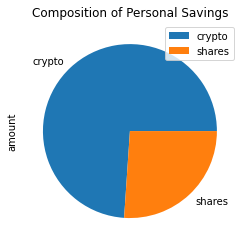

In [72]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")


In [140]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
emergency_fund

36000

In [141]:
# Calculate total amount of savings
total_savings = df_savings.sum()
total_savings

amount    143924.069394
dtype: float64

In [133]:
#Calculate the amount you would be short of missing your ideal emergency fund
short_funds = emergency_fund - total_savings

In [142]:
#Use if statement to validate if the current savings are enough for an emergency fund
if (total_savings > emergency_fund).any():
    print("Congratulations! you have enough money in your emergency fund")
elif (total_savings == emergency_fund).any():
    print("Congratulations on reaching this financial goal")

elif (total_savings < emergency_fund).any() & (short_funds > 0).any():
    print(f"You are {short_funds} away from reaching your financial goal of an established emergency fund")

Congratulations! you have enough money in your emergency fund


In [ ]:
#Part 2 - Retirement Planning

In [95]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-05-01', tz='America/New_York').isoformat()

In [96]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [97]:
# Set the ticker information
tickers = ["SPY","AGG"]

# Set timeframe to "1Day"
timeframe = "1Day"

# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_stock_data.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2017-05-01 04:00:00+00:00,108.86,108.9599,108.620,108.73,2510027,11008,108.743679,AGG
2017-05-02 04:00:00+00:00,108.68,108.9400,108.679,108.88,2841518,9263,108.831870,AGG
2017-05-03 04:00:00+00:00,108.97,108.9900,108.770,108.77,1923403,10987,108.902870,AGG
2017-05-04 04:00:00+00:00,108.55,108.7000,108.550,108.68,1897912,7501,108.629678,AGG
2017-05-05 04:00:00+00:00,108.72,108.7400,108.570,108.70,1421843,7385,108.675918,AGG


In [98]:
# Reorganize the DataFrame
# Separate ticker data
SPY = df_stock_data[df_stock_data["symbol"]=="SPY"].drop("symbol", axis=1)
AGG = df_stock_data[df_stock_data["symbol"]=="AGG"].drop("symbol", axis=1)


# Concatenate the ticker DataFrames
df_stock_data = pd.concat([SPY, AGG], axis=1, keys=["SPY","AGG"])

# Display sample data
df_stock_data.head()

SPY                                       \
                             open      high      low   close    volume   
timestamp                                                                
2017-05-01 04:00:00+00:00  238.66  239.1700  238.195  238.68  66882521   
2017-05-02 04:00:00+00:00  238.82  238.9800  238.300  238.77  57375732   
2017-05-03 04:00:00+00:00  238.29  238.8775  237.700  238.48  73137731   
2017-05-04 04:00:00+00:00  238.81  238.9225  237.780  238.76  61462732   
2017-05-05 04:00:00+00:00  239.16  239.7200  238.680  239.70  62001269   

                                                      AGG                     \
                          trade_count        vwap    open      high      low   
timestamp                                                                      
2017-05-01 04:00:00+00:00      180740  238.682276  108.86  108.9599  108.620   
2017-05-02 04:00:00+00:00      176648  238.630973  108.68  108.9400  108.679   
2017-05-03 04:00:00+00:00      223568  238.418100  108.97  108.9900  108.770   
2017-05-04 04:00:00+00:00      208872  238.541805  108.55  108.7000  108.550   
2017-05-05 04:00:00+00:00      204885  239.253410  108.72  108.7400  108.570   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2017-05-01 04:00:00+00:00  108.73  2510027       11008  108.743679  
2017-05-02 04:00:00+00:00  108.88  2841518        9263  108.831870  
2017-05-03 04:00:00+00:00  108.77  1923403       10987  108.902870  
2017-05-04 04:00:00+00:00  108.68  1897912        7501  108.629678  
2017-05-05 04:00:00+00:00  108.70  1421843        7385  108.675918

In [99]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns with wieghts 60%(stocks) for SPY and 40%(bonds) for AGG

MC_SPY_AGG = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.6,.4],
    num_simulation = 500,
    num_trading_days = 252*30
)

# Print the simulation input data
MC_SPY_AGG.portfolio_data.head()

SPY                                       \
                             open      high      low   close    volume   
timestamp                                                                
2017-05-01 04:00:00+00:00  238.66  239.1700  238.195  238.68  66882521   
2017-05-02 04:00:00+00:00  238.82  238.9800  238.300  238.77  57375732   
2017-05-03 04:00:00+00:00  238.29  238.8775  237.700  238.48  73137731   
2017-05-04 04:00:00+00:00  238.81  238.9225  237.780  238.76  61462732   
2017-05-05 04:00:00+00:00  239.16  239.7200  238.680  239.70  62001269   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-05-01 04:00:00+00:00      180740  238.682276          NaN  108.86   
2017-05-02 04:00:00+00:00      176648  238.630973     0.000377  108.68   
2017-05-03 04:00:00+00:00      223568  238.418100    -0.001215  108.97   
2017-05-04 04:00:00+00:00      208872  238.541805     0.001174  108.55   
2017-05-05 04:00:00+00:00      204885  239.253410     0.003937  108.72   

                                                                           \
                               high      low   close   volume trade_count   
timestamp                                                                   
2017-05-01 04:00:00+00:00  108.9599  108.620  108.73  2510027       11008   
2017-05-02 04:00:00+00:00  108.9400  108.679  108.88  2841518        9263   
2017-05-03 04:00:00+00:00  108.9900  108.770  108.77  1923403       10987   
2017-05-04 04:00:00+00:00  108.7000  108.550  108.68  1897912        7501   
2017-05-05 04:00:00+00:00  108.7400  108.570  108.70  1421843        7385   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-05-01 04:00:00+00:00  108.743679          NaN  
2017-05-02 04:00:00+00:00  108.831870     0.001380  
2017-05-03 04:00:00+00:00  108.902870    -0.001010  
2017-05-04 04:00:00+00:00  108.629678    -0.000827  
2017-05-05 04:00:00+00:00  108.675918     0.000184

In [100]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_SPY_AGG.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\owner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992684,0.998423,1.002006,1.000473,0.988377,0.998989,1.013709,1.003630,0.995573,0.993774,...,1.009989,1.001275,0.988607,1.001436,0.995150,0.999610,1.001926,1.002374,1.003160,0.999295
2,1.006232,1.011427,0.998403,1.011009,0.994235,1.002966,1.007698,1.009651,0.992763,0.996675,...,1.010405,1.002373,0.989706,0.999876,0.994708,1.000398,1.001023,1.000827,0.995651,1.001216
3,1.008017,1.000943,0.996411,1.000638,0.996058,1.006179,0.991036,0.996897,0.997169,1.002044,...,1.010282,0.999139,0.983399,0.991984,0.991963,0.993197,1.004369,0.987019,0.992492,0.995062
4,1.005233,1.017849,0.981242,0.999204,1.003849,1.026434,0.997341,0.983820,0.999089,0.996358,...,1.008096,0.998489,0.983556,0.987037,1.001673,0.988659,1.004450,0.978910,0.991411,0.992180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,5.068743,2.525482,15.365789,3.092920,4.098262,2.364240,3.870241,4.695593,12.637433,2.026549,...,4.610280,6.026863,2.612996,4.885027,8.760541,11.798346,7.155023,19.093992,10.649926,6.655572
7557,5.122487,2.539178,15.200992,3.055301,4.087895,2.373864,3.875195,4.728819,12.711017,1.994325,...,4.645657,6.062904,2.620329,4.923124,8.782796,11.886284,7.153648,19.202321,10.810908,6.785916
7558,5.146296,2.545799,15.288020,3.036626,4.090967,2.395710,3.910681,4.742237,12.749085,1.980322,...,4.653968,6.087877,2.640998,4.937265,8.650650,11.930059,7.012532,19.162321,10.887490,6.798656
7559,5.193287,2.533097,15.169180,3.006180,4.121638,2.386323,3.971338,4.710306,12.769518,2.000550,...,4.640470,6.122206,2.637000,4.974546,8.773379,12.014401,7.015109,19.351988,11.082469,6.759861


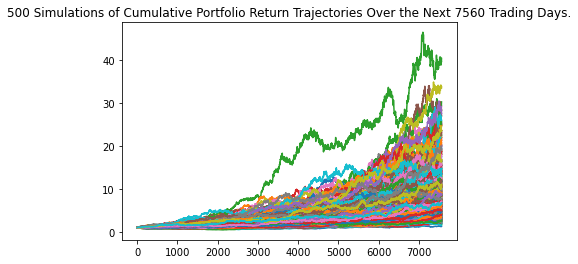

In [101]:
# Plot simulation outcomes
line_plot = MC_SPY_AGG.plot_simulation()

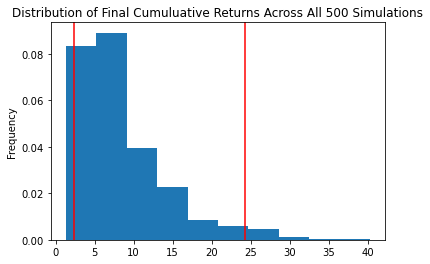

In [102]:
# Plot probability distribution and confidence intervals
dist_plot = MC_SPY_AGG.plot_distribution()

In [103]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_SPY_AGG.summarize_cumulative_return()

# Print summary statistics
print(tbl)


count           500.000000
mean              8.505939
std               5.763479
min               1.293521
25%               4.444648
50%               6.866971
75%              10.765325
max              40.319911
95% CI Lower      2.293211
95% CI Upper     24.230945
Name: 7560, dtype: float64


In [104]:
# Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a $20,000 initial investment.

# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $45864.22 and $484618.9


In [105]:
#Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a 50% increase in the initial investment.

# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $68796.33 and $726928.35


In [106]:
#Optional Challenge - Early Retirement
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns with wieghts 80%(stocks) for SPY and 20%(bonds) for AGG

MC_SPY_AGG_early = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.8,.2],
    num_simulation = 500,
    num_trading_days = 252*10
)



In [107]:

# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_SPY_AGG_early.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\owner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994859,0.984107,0.997503,0.983554,1.004607,1.002971,1.005406,1.002360,1.011274,0.993768,...,1.015787,0.992183,1.004971,1.010785,0.983531,1.003865,0.999404,1.008305,1.009709,0.988130
2,0.977828,0.984251,1.005554,0.984691,0.994453,0.995778,1.013148,0.987161,1.005316,0.996981,...,1.015382,0.996999,1.021488,1.020945,0.988112,1.004790,0.999199,1.002482,1.017928,0.990677
3,0.985190,0.975042,1.009632,0.997843,1.004407,0.991494,0.989201,0.973530,0.998293,0.989486,...,1.015096,1.005725,1.020018,1.010419,1.000144,0.992119,0.977337,1.006544,1.022399,0.979392
4,0.982452,0.978943,1.014868,0.985828,0.981884,0.979800,0.988414,0.985625,1.019782,0.981876,...,1.015699,1.000927,0.995456,1.025749,1.001991,1.000646,0.973979,1.012692,1.022936,0.966366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,4.254353,1.699101,2.168861,1.725626,3.406222,2.219435,2.308914,0.955212,1.803197,1.734239,...,2.810916,3.340405,2.140128,1.116001,1.598105,1.822112,2.366555,1.563628,6.521071,1.411930
2517,4.239485,1.707846,2.169088,1.717085,3.440940,2.205438,2.339927,0.971664,1.785968,1.727474,...,2.816624,3.318320,2.114886,1.128553,1.593174,1.804370,2.414296,1.568909,6.536427,1.415012
2518,4.258580,1.710058,2.153256,1.729969,3.425386,2.193136,2.300369,0.966033,1.782602,1.712103,...,2.810537,3.308007,2.132705,1.134668,1.593351,1.776851,2.454862,1.580016,6.377566,1.407531
2519,4.196069,1.727841,2.160823,1.747313,3.404283,2.215315,2.297066,0.961244,1.784113,1.709312,...,2.818645,3.301547,2.106198,1.119065,1.578863,1.771157,2.438796,1.581021,6.321443,1.408700


In [108]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_early = MC_SPY_AGG_early.summarize_cumulative_return()

# Print summary statistics
print(tbl_early)

count           500.000000
mean              2.775482
std               1.446031
min               0.649723
25%               1.783145
50%               2.528549
75%               3.389794
max              13.763499
95% CI Lower      0.860976
95% CI Upper      6.090492
Name: 2520, dtype: float64


In [111]:
# Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a $50,000 initial investment.

# Set initial investment
initial_investment = 20000*2.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $50,000
ci_lower_early = round(tbl_early[8]*initial_investment,2)
ci_upper_early = round(tbl_early[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_early} and ${ci_upper_early}")

There is a 95% chance that an initial investment of $50000.0 in the portfolio over the next 10 years will end within in the range of $43048.79 and $304524.62
